In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from hs2 import herdingspikes
from probe import BioCam
from sklearn.cluster import DBSCAN

%matplotlib inline

In [2]:
data_path = '/home/cole/P29_16_05_14_retina02_left_stim3_fullarray_fullfieldHDF5.brw'

to_localize = True
cutout_start = 10
cutout_end = 30
threshold = 20
file_name = 'ProcessedSpikes'

In [3]:
Probe = BioCam(data_path)
H = herdingspikes(Probe)

3Brain data format: 100


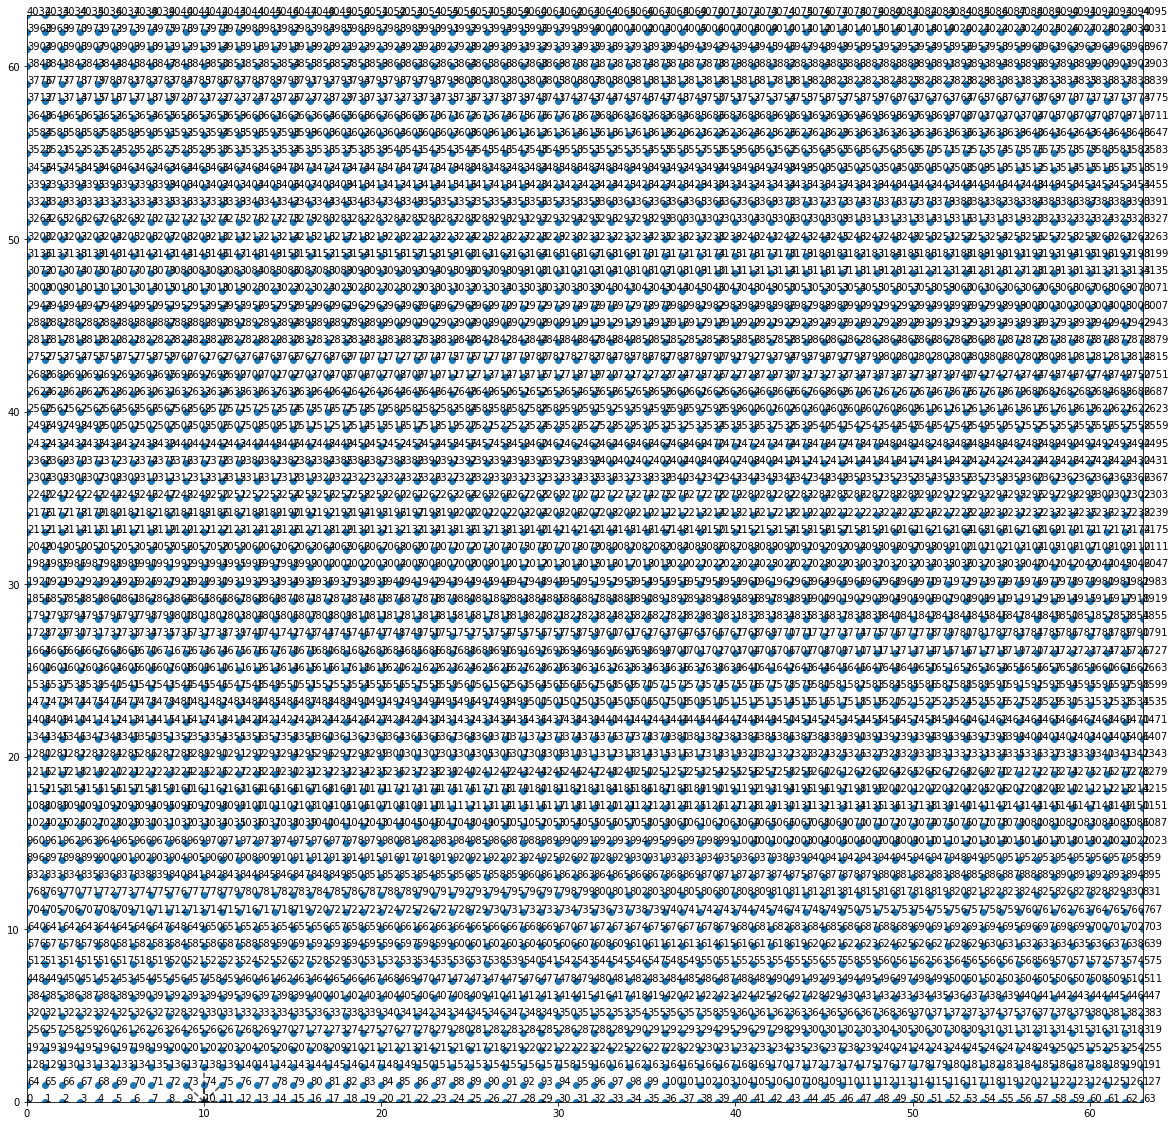

In [4]:
Probe.show(figwidth=20)

In [9]:
H.DetectFromRaw(to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0)

# # OR

#H.LoadDetected()

# Sampling rate: 7022
# Localization On
# Not Masking any Channels
# Number of recorded channels: 4096
# Analysing frames: 912032, Seconds:129.881008418
# Frames before spike in cutout: 7
# Frames after spike in cutout: 15
# tcuts: 22 42
# tInc: 200000
# Analysing 200000 frames; -22 200042
here?
fail here
mean voltage getting...
done voltage getting
iterating...
done iterating
# Analysing 200000 frames; 199978 400042
mean voltage getting...
done voltage getting
iterating...
done iterating
# Analysing 200000 frames; 399978 600042
mean voltage getting...
done voltage getting
iterating...
done iterating
# Analysing 200000 frames; 599978 800042
mean voltage getting...
done voltage getting
iterating...
done iterating
# Analysing 111990 frames; 799978 912032
mean voltage getting...
done voltage getting
iterating...
done iterating
# Time taken for detection: 0:01:52.682258
# Time per frame: 0:00:00.123551
# Time per sample: 0:00:00.000030
Detected and read 468227 spikes.


Spike detected at channel:  1069
Spike detected at frame:  193


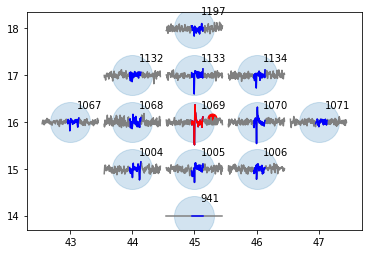

In [22]:
#plt.figure(figsize=(20, 10))
H.PlotTracesChannels(52)

In [ ]:
import numpy as np
pos = H.probe.positions
neighs = H.probe.neighbors
plt.scatter(np.array(pos)[neighs[2914], 0],
            np.array(pos)[neighs[2914], 1],
            s=1600, alpha=0.2)


In [ ]:
plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=1, alpha=0.05)
plt.axis('equal')

In [ ]:
%%time
# H.CombinedClustering(alpha=40,
#                     bandwidth = 20, bin_seeding=True, min_bin_freq=10,
#                     pca_ncomponents=2, pca_whiten=True,
#                     n_jobs=-1)
H.CombinedClustering(alpha=0.4,
                    bandwidth = 0.3, bin_seeding=True, min_bin_freq=10,
                    pca_ncomponents=2, pca_whiten=True,
                    n_jobs=-1)

In [ ]:
plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=1)
# plt.xlim((1350,1600))
plt.title("MeanShift, bandwidth=.3, min_bin_freq=10")

In [ ]:
H.CombinedClustering(eps=0.2, alpha=0.4, clustering_algorithm=DBSCAN,
                    min_samples=5, pca_ncomponents=2, pca_whiten=True,
                    n_jobs=-1)

In [ ]:
plt.figure(figsize=(12, 12))
H.PlotAll(invert=True, s=1)
plt.title("DBSCAN eps=8, min_samples=5")
# plt.xlim((1350,1600))


In [ ]:
units = (0,1,10,2019)

H.PlotShapes(units)

In [ ]:
H.clusters